In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = {
    "description": [
        "A young wizard fights dark forces at a magical school",
        "Two lovers struggle to stay together despite family issues",
        "A detective investigates a mysterious murder case",
        "A group of astronauts travel to space and face danger",
        "A haunted house terrorizes a small town",
        "A superhero saves the world from destruction",
        "A funny story of three friends on a road trip",
        "A king fights for his kingdom in an ancient war"
    ],
    "genre": [
        "Fantasy",
        "Romance",
        "Thriller",
        "Sci-Fi",
        "Horror",
        "Action",
        "Comedy",
        "Action"
    ]
}

df = pd.DataFrame(data)
df.head()

,description,genre
0,A young wizard fights dark forces at a magical...,Fantasy
1,Two lovers struggle to stay together despite f...,Romance
2,A detective investigates a mysterious murder case,Thriller
3,A group of astronauts travel to space and face...,Sci-Fi
4,A haunted house terrorizes a small town,Horror


In [4]:
X = df["description"]
y = df["genre"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
vectorizer = TfidfVectorizer(stop_words="english")

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [6]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [7]:
y_pred = model.predict(X_test_tfidf)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.5


In [14]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

      Action       0.50      1.00      0.67         1
     Romance       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


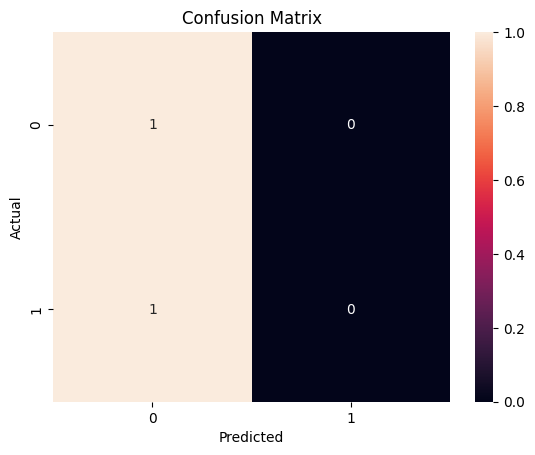

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
pickle.dump(model, open("movie_genre_model.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))

print("Model and Vectorizer Saved Successfully!")

Model and Vectorizer Saved Successfully!


In [13]:
def predict_genre(text):
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)
    return prediction[0]

# Test
sample = "A spaceship travels to another galaxy"
print("Predicted Genre:", predict_genre(sample))

Predicted Genre: Action


In [17]:
pickle.dump(model, open("movie_genre_model.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))

In [18]:
import pickle

# Save model
with open("movie_genre_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model and Vectorizer Saved Successfully!")

✅ Model and Vectorizer Saved Successfully!


In [19]:
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [20]:
import os
os.listdir()

['.config', 'sample_data', 'tfidf_vectorizer.pkl', 'movie_genre_model.pkl']

In [21]:
from google.colab import files
files.download("movie_genre_model.pkl")
files.download("tfidf_vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import joblib